
Model Performance Comparison:
DecisionTreeRegressor: MSE = 75.81, SSE = 22743.72
RandomForestRegressor: MSE = 36.22, SSE = 10866.31
BaggingRegressor: MSE = 35.61, SSE = 10683.98
AdaBoostRegressor: MSE = 76.25, SSE = 22874.32
ExtraTreesRegressor: MSE = 24.21, SSE = 7264.09
GradientBoostingRegressor: MSE = 23.21, SSE = 6963.02
HistGradientBoostingRegressor: MSE = 17.18, SSE = 5153.33


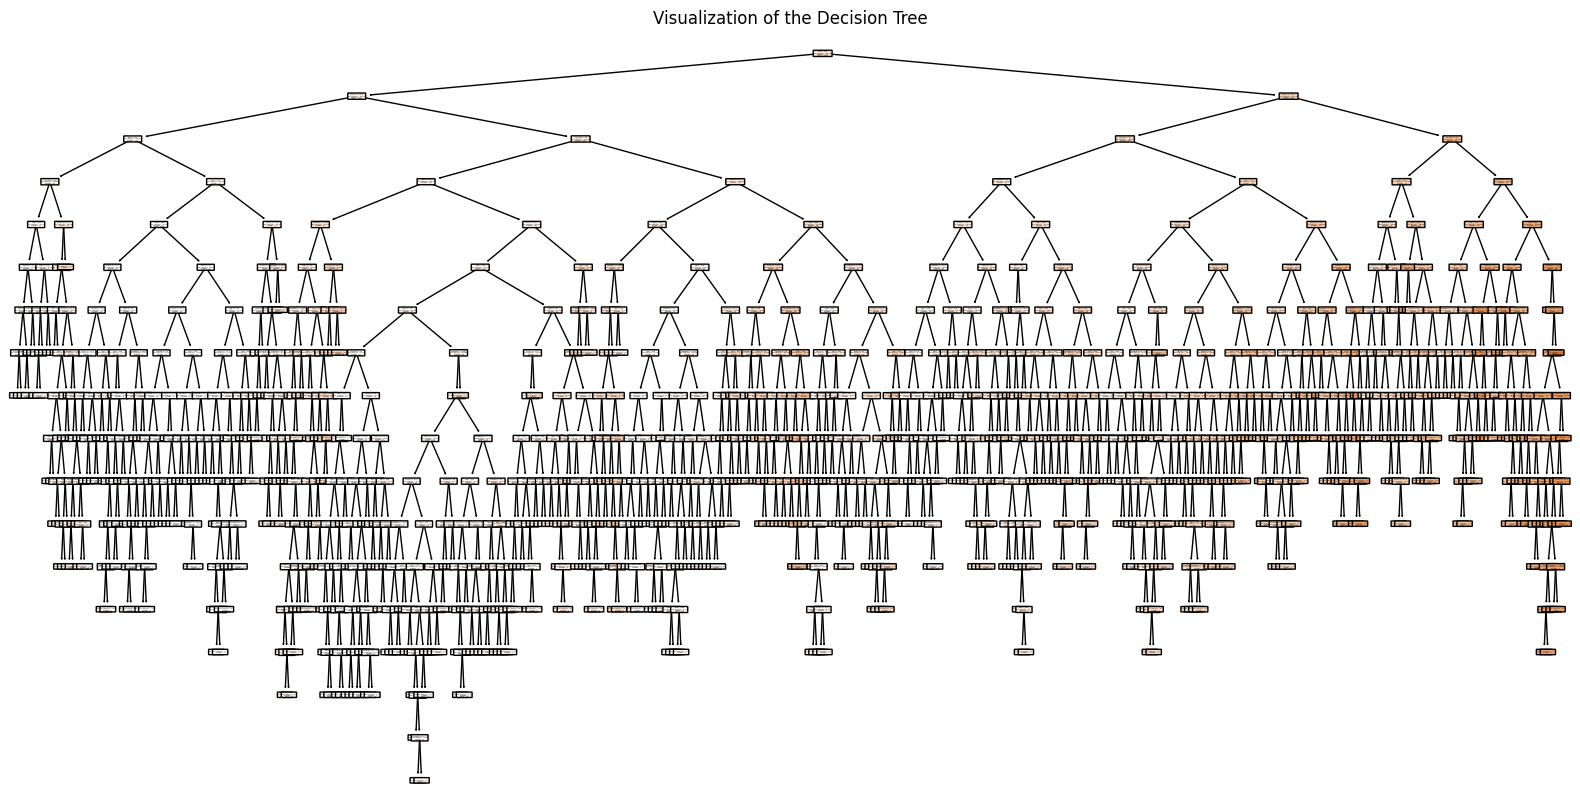

In [7]:
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/content/heartRisk.csv")

# Prepare the features and target
X = data.drop(columns=['Risk'])
Y = data['Risk']

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Define the models
dt_regressor = DecisionTreeRegressor(random_state=42)
rf_regressor = RandomForestRegressor(n_estimators=100, bootstrap=True, random_state=42)
bagging_regressor = BaggingRegressor(estimator=None, n_estimators=100, bootstrap=True, random_state=42)
adaboost_regressor = AdaBoostRegressor(n_estimators=50, learning_rate=0.1, random_state=42)
extra_trees_regressor = ExtraTreesRegressor(n_estimators=100, bootstrap=False, random_state=42)
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
hist_gb_regressor = HistGradientBoostingRegressor(max_iter=100, learning_rate=0.1, random_state=42)

# Train the models
models = {
    'DecisionTreeRegressor': dt_regressor,
    'RandomForestRegressor': rf_regressor,
    'BaggingRegressor': bagging_regressor,
    'AdaBoostRegressor': adaboost_regressor,
    'ExtraTreesRegressor': extra_trees_regressor,
    'GradientBoostingRegressor': gb_regressor,
    'HistGradientBoostingRegressor': hist_gb_regressor
}

for model_name, model in models.items():
    model.fit(X_train, Y_train)

# Evaluate model performance
results = {}
for model_name, model in models.items():
    Y_pred = model.predict(X_test)
    mse = mean_squared_error(Y_test, Y_pred)
    sse = mse * len(Y_test)
    results[model_name] = {'MSE': mse, 'SSE': sse}

# Print model performance
print("\nModel Performance Comparison:")
for model_name, metrics in results.items():
    print(f"{model_name}: MSE = {metrics['MSE']:.2f}, SSE = {metrics['SSE']:.2f}")

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_regressor,
          feature_names=X.columns,
          filled=True,
          rounded=True)
plt.title("Visualization of the Decision Tree")
plt.show()